In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import urllib.request

from sklearn.metrics import confusion_matrix

In [5]:
training = pd.read_csv('har_train.csv')
test = pd.read_csv('har_validate.csv')
def download_csv(url):
    csv = urllib.request.urlopen(url).read() # returns type 'str'
    file_name = url.split('/')[-1]
    with open(file_name, 'wb') as fx: # str, hence mode 'w'
        fx.write(csv)

In [6]:
# train_dataset_url = "https://raw.githubusercontent.com/selva86/datasets/master/har_train.csv"
# test_dataset_url = "https://raw.githubusercontent.com/selva86/datasets/master/har_validate.csv"
# download_csv(train_dataset_url)
# download_csv(test_dataset_url)

In [7]:
x_train = training.drop('classe', axis=1)
y_train = training.loc[:, 'classe']

x_test = test.drop('classe', axis=1)
y_test = test.loc[:, 'classe']

In [8]:
model = GaussianNB()
model.fit(x_train, y_train)

prediction = model.predict(x_test)
print(prediction[:5])

['A' 'A' 'A' 'A' 'A']


In [11]:
matrix = confusion_matrix(prediction, y_test)
print(matrix)

[[1070  127  223  102   51]
 [  95  685  106   35  239]
 [ 262  145  512  271   95]
 [ 212   76  136  441  143]
 [  35  106   49  115  554]]


In [14]:
names = np.unique(prediction)
print(names)

['A' 'B' 'C' 'D' 'E']


Text(89.18, 0.5, 'Predicted')

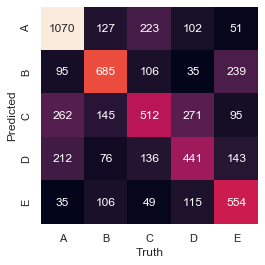

In [16]:
sb.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')